# Optimizers

In this notebook we will be comparing the most common optimizer to train feed-forward neural networks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To test these optimizers, let us consider the following function and its respective gradient matrix.

$$
    f(x, y) = x^2 + 2xy + y^2
$$

$$
    \nabla f = \begin{bmatrix} 2x + 2y \\ 2y + 2x\end{bmatrix}
$$

In [192]:
def f(x, y): return 0.4 * x ** 2 + x * y + 1.3 * y ** 2
X, Y = np.mgrid[-4: 4:0.1, -4: 4:0.1]

In [91]:
def gradf(f, *xv, epsilon=1e-6):
    """
    Approximate the numerical gradient of f
    at around xv
    
    Parameters
    ----------
    f: function
        vectorized and derivable function
    xv: the evaluating points
    
    Returns
    -------
    np.array of shape (len(xv),);
    """
    nx = len(xv)
    xv_stack = np.array([xv for _ in range(nx)]).reshape(-1, nx)
    xv_stack_pos = (xv_stack + np.eye(nx) * epsilon).T
    xv_stack_neg = (xv_stack - np.eye(nx) * epsilon).T
    grad = (f(*xv_stack_pos) - f(*xv_stack_neg)) / (2 * epsilon)
    return grad

### *Plain Vanilla* Gradient-Descent
The update rule for the gradient descent is given by:
$$
    x:= x - \alpha\nabla f(x)
$$

With
* $\alpha$, the learning rate

Total steps taken: 1,387


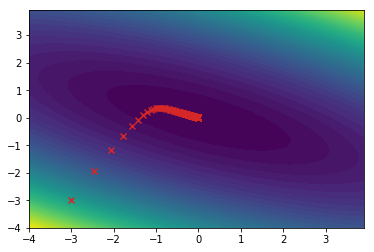

In [193]:
x0 = np.array([-3, -3])
alpha = 0.1
learning_history = [x0]
f1, f0 = f(*x0), 1e6
while abs(f1 / f0 - 1) > 1e-2:
    x0 = x0 - alpha * gradf(f, *x0)
    learning_history.append(x0)
    f0, f1 = f1, f(*x0)

plt.contourf(X, Y, f(X, Y), 50)
plt.scatter(*np.r_[learning_history].T, color="tab:red", marker="x")
print(f"Total steps taken: {len(learning_history):,}")

### Momentum Optimization
The update rule for the momentum optimization is given by:

$$
    \begin{align}
    m &:= \beta m + \alpha \nabla f(x)\\
    x &:= x - m
    \end{align}
$$

With,
* $\alpha$: learning rate
* $\beta$: momentum

The *momentum* coefficient, $\beta \in [0, 1)$, is used as an acceleration hyperparameter. The higher $\beta$ is, the less friction is. To see comprehend this, consider $\nabla f(x)$ fixed and let $m_{k}$ be the momentum term at the $k$-th iteration. Since

$$
    \begin{align}
    m_n &= \beta m_{n-1} + \alpha \nabla f(x)\\
        &= \beta \left(\beta m_{n-2} + \alpha \nabla f(x) \right) + \alpha \nabla f(x) \\
        &= \beta^2 m_{n-2} + \beta \alpha \nabla f(x) + \alpha \nabla f(x)\\
        &= \beta^3 m_{n-3} + \beta^2 \alpha \nabla f(x) + \beta \alpha \nabla f(x) + \alpha \nabla f(x)\\
        &= \ldots
    \end{align}
$$

In general,
$$
    m_n = \beta^{n} m_0 + \alpha \nabla f(x) \sum_{k=0}^{n-1} \beta^k
$$

Considering $m_0 = 1$ and taking $n\to\infty$, i.e., the *terminal* velocity, we see that
$$
    \begin{align}
    \lim_{n\to\infty} m_n &= \lim_{n\to\infty} \beta^{n} + \alpha \nabla f(x) \sum_{k=0}^{n-1} \beta^k \\
    &=\lim_{n\to\infty} \alpha \nabla f(x) \sum_{k=0}^{n-1} \beta^k\\
    \end{align}
$$

Recalling that $\sum_{k=0}^{n-1}\beta^k = \frac{1 - \beta^n}{1 - \beta}$, we conclude that

$$
    \lim_{n\to\infty} m_n = \frac{\alpha \nabla f}{1 - \beta}
$$

E.g., for $\beta =0.99$, this would imply going 100x faster than gradient descent!

In [ ]:
x0 = np.array([-3, -3])
alpha = 0.1
learning_history = [x0]
f1, f0 = f(*x0), 1e6
